In [1]:
%matplotlib ipympl
import numpy as np
from numpy.fft import  ifft2, ifftshift
#from scipy.special import kv as beselk
from matplotlib import pyplot as plt
from ipywidgets import interact, widgets
from ows import ows
import time
import threading
rad2asec = 3600 * 180/np.pi
asec2rad = 1/rad2asec

## PSD
Power spectrum density

In [2]:
N = 128  # Matrix size
r0 = .1
L0 = -1
l0 = .1
px_size = 3.5e-6

def psd(N, r0, dx, l0 = 0, L0 = -1):
    Df = 1/(N*dx) 
    fx = np.linspace(-N/2,N/2-1,N)* Df
    fpcoohfx, fpcoohfy = np.meshgrid(fx,fx) # Since it will be computed anyways, fpcoohfy will be used instead of rotating the xmatrix.
    xpcoohf = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            xpcoohf[i][j]= np.sqrt(fpcoohfx[i][j]**2 + fpcoohfy[i][j]**2)  # pupil plane coordianate radius


          
    Watm = np.zeros((N,N)).astype(float)
    # TODO: Check if it is necessary to check weather (px.val <= 0)
    if L0 == -1:
        #TODO: Evaluate wheather it is necessary to check weather (px.val <= 0)
        for i in range(N):
            for j in range(N):
                if fpcoohfx[i][j]**2 + fpcoohfy[i][j]**2 != 0:
                    Watm[i][j] = 0.022896/(r0**(5/3))*(fpcoohfx[i][j]**2 + fpcoohfy[i][j]**2)**(-11/6)
    else:
        Watm = 0.022896/(r0**(5/3))*(fpcoohfx**2+fpcoohfy**2 +1/(L0**2))**(-11/6)
    PSD = Watm#*dphi
    PSD[int(N/2), int(N/2)] = 0
    return PSD
PSD = ows.psd(N, r0, px_size, l0, L0)


## Phase screen

In [3]:
# Replace tmp1 and tmp2 to be more explicit
# They are currenty used in order to make it easier to compare with the original code
rad2asec = 3600 * 180/np.pi
asec2rad = 1/rad2asec

SEED = None
FoV = 60 # arcsec
Npx = 540 # image plane pixels qty
Daf = 0.01#asec2rad*FoV/Npx # [rad/px]  (Numerical aperture)

wl = 500e-9 # [m]
dfp = Daf/wl # [/m] Pupil plane spatial frequency pixel size (Numerical aperture/WL)
dxp = 1/(dfp*N) # Pupil plane pixel size

The time of execution of above program is : 33889.986991882324 ms


NameError: name 'phase_screen' is not defined

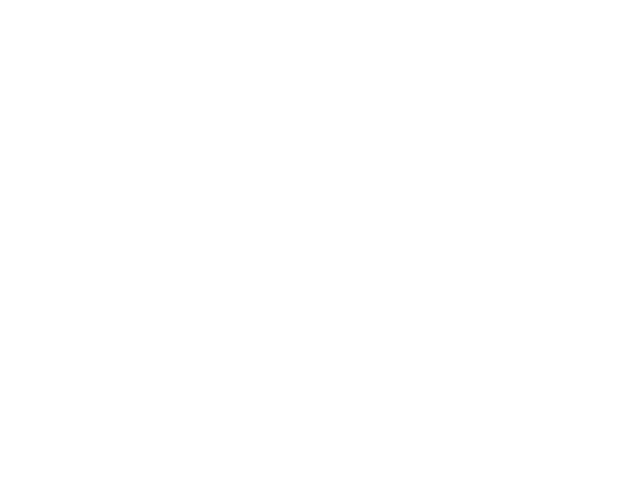

In [ ]:
n = 10000

start = time.time()
for i in range(n):
    phase_screen = ows.phase_screen(N, PSD, dxp)

end = time.time()
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

plt.close(3)
plt.figure(3)
plt.imshow(np.imag(phase_screen))
plt.title("Phase Screen (imag)")
plt.colorbar()
plt.show()
